# Media Pipe explained

In [61]:
import os
import numpy as np
import matplotlib.pyplot as plt

import cv2
import mediapipe as mp


In [62]:
def print_elements(x, in_row = 5):
    names = [e.name for e in x]
    names_length = len(names)
    for i in range(names_length // in_row):
        print(names[(i * in_row):min((i + 1) * in_row, names_length)])

def print_connections(connections, points, in_row = 3):
    points = {e.value:e.name for e in points}
    connections_as_string = [(points.get(i), points.get(j)) for (i, j) in connections]
    connections_length = len(connections_as_string)
    for i in range(connections_length // in_row):
        print(connections_as_string[(i * in_row):min((i + 1) * in_row, connections_length)])

Models preparation:

In [63]:
mp_hands = mp.solutions.hands
mp_face = mp.solutions.face_detection
mp_pose = mp.solutions.pose
mp_facemesh = mp.solutions.face_mesh
mp_holistic = mp.solutions.holistic

## Hand and Pose
Point names to be detected

In [64]:
print('Hands parts')
print(type(mp_hands.HandLandmark))
print_elements(mp_hands.HandLandmark)

print('\nFace parts')
print(type(mp_face.FaceKeyPoint))
print_elements(mp_face.FaceKeyPoint)

print('\nPose parts')
print(type(mp_pose.PoseLandmark))
print_elements(mp_pose.PoseLandmark)



Hands parts
<class 'enum.EnumMeta'>
['WRIST', 'THUMB_CMC', 'THUMB_MCP', 'THUMB_IP', 'THUMB_TIP']
['INDEX_FINGER_MCP', 'INDEX_FINGER_PIP', 'INDEX_FINGER_DIP', 'INDEX_FINGER_TIP', 'MIDDLE_FINGER_MCP']
['MIDDLE_FINGER_PIP', 'MIDDLE_FINGER_DIP', 'MIDDLE_FINGER_TIP', 'RING_FINGER_MCP', 'RING_FINGER_PIP']
['RING_FINGER_DIP', 'RING_FINGER_TIP', 'PINKY_MCP', 'PINKY_PIP', 'PINKY_DIP']

Face parts
<class 'enum.EnumMeta'>
['RIGHT_EYE', 'LEFT_EYE', 'NOSE_TIP', 'MOUTH_CENTER', 'RIGHT_EAR_TRAGION']

Pose parts
<class 'enum.EnumMeta'>
['NOSE', 'LEFT_EYE_INNER', 'LEFT_EYE', 'LEFT_EYE_OUTER', 'RIGHT_EYE_INNER']
['RIGHT_EYE', 'RIGHT_EYE_OUTER', 'LEFT_EAR', 'RIGHT_EAR', 'MOUTH_LEFT']
['MOUTH_RIGHT', 'LEFT_SHOULDER', 'RIGHT_SHOULDER', 'LEFT_ELBOW', 'RIGHT_ELBOW']
['LEFT_WRIST', 'RIGHT_WRIST', 'LEFT_PINKY', 'RIGHT_PINKY', 'LEFT_INDEX']
['RIGHT_INDEX', 'LEFT_THUMB', 'RIGHT_THUMB', 'LEFT_HIP', 'RIGHT_HIP']
['LEFT_KNEE', 'RIGHT_KNEE', 'LEFT_ANKLE', 'RIGHT_ANKLE', 'LEFT_HEEL']


Connections

In [65]:
print("Hand connections")
print_connections(mp_hands.HAND_CONNECTIONS, mp_hands.HandLandmark)

print("Pose connections")
print_connections(mp_pose.POSE_CONNECTIONS, mp_pose.PoseLandmark)

Hand connections
[('THUMB_IP', 'THUMB_TIP'), ('WRIST', 'INDEX_FINGER_MCP'), ('PINKY_MCP', 'PINKY_PIP')]
[('WRIST', 'PINKY_MCP'), ('RING_FINGER_MCP', 'RING_FINGER_PIP'), ('RING_FINGER_MCP', 'PINKY_MCP')]
[('PINKY_PIP', 'PINKY_DIP'), ('INDEX_FINGER_MCP', 'INDEX_FINGER_PIP'), ('INDEX_FINGER_MCP', 'MIDDLE_FINGER_MCP')]
[('RING_FINGER_PIP', 'RING_FINGER_DIP'), ('WRIST', 'THUMB_CMC'), ('MIDDLE_FINGER_MCP', 'MIDDLE_FINGER_PIP')]
[('THUMB_CMC', 'THUMB_MCP'), ('MIDDLE_FINGER_MCP', 'RING_FINGER_MCP'), ('MIDDLE_FINGER_PIP', 'MIDDLE_FINGER_DIP')]
[('PINKY_DIP', 'PINKY_TIP'), ('INDEX_FINGER_PIP', 'INDEX_FINGER_DIP'), ('RING_FINGER_DIP', 'RING_FINGER_TIP')]
[('THUMB_MCP', 'THUMB_IP'), ('MIDDLE_FINGER_DIP', 'MIDDLE_FINGER_TIP'), ('INDEX_FINGER_DIP', 'INDEX_FINGER_TIP')]
Pose connections
[('LEFT_WRIST', 'LEFT_THUMB'), ('RIGHT_WRIST', 'RIGHT_INDEX'), ('RIGHT_PINKY', 'RIGHT_INDEX')]
[('LEFT_EYE_OUTER', 'LEFT_EAR'), ('RIGHT_ELBOW', 'RIGHT_WRIST'), ('LEFT_HIP', 'LEFT_KNEE')]
[('RIGHT_ANKLE', 'RIGHT_HEEL')

## Face Contours
Number of face landmarks

In [66]:
print('FACEMESH_NUM_LANDMARKS\n\t' + str(mp_facemesh.FACEMESH_NUM_LANDMARKS))
print('FACEMESH_NUM_LANDMARKS_WITH_IRISES\n\t' + str(mp_facemesh.FACEMESH_NUM_LANDMARKS_WITH_IRISES))

FACEMESH_NUM_LANDMARKS
	468
FACEMESH_NUM_LANDMARKS_WITH_IRISES
	478


Face Contours

In [67]:
FACEMESH_IRISES =['FACEMESH_LEFT_IRIS', 'FACEMESH_RIGHT_IRIS']

FACEMESH_CONTOURS = ['FACEMESH_LIPS', 'FACEMESH_LEFT_EYE', 'FACEMESH_LEFT_EYEBROW',
                     'FACEMESH_RIGHT_EYE', 'FACEMESH_RIGHT_EYEBROW', 'FACEMESH_FACE_OVAL']


for face_contour_type in FACEMESH_IRISES + FACEMESH_CONTOURS:
    face_contour_subcomponents = vars(mp_facemesh).get(face_contour_type)
    print(face_contour_type+ '\n\t' + str(len(face_contour_subcomponents)))

FACEMESH_LEFT_IRIS
	4
FACEMESH_RIGHT_IRIS
	4
FACEMESH_LIPS
	40
FACEMESH_LEFT_EYE
	16
FACEMESH_LEFT_EYEBROW
	8
FACEMESH_RIGHT_EYE
	16
FACEMESH_RIGHT_EYEBROW
	8
FACEMESH_FACE_OVAL
	36


Face tesselation

In [68]:
print('FACEMESH_TESSELATION\n\t' + str(len(mp_facemesh.FACEMESH_TESSELATION)))

FACEMESH_TESSELATION
	2556


## Face keypoints detection

In [69]:
test_files_dir = os.path.join(os.getcwd(), "./test_files")
IMAGE_FILES = [os.path.join(test_files_dir, f) for f in os.listdir(test_files_dir)]

In [70]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

In [71]:
file_name = IMAGE_FILES[1]
with mp_facemesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5) as face_mesh:
    print(file_name)
    image = cv2.imread(file_name)
    # Convert the BGR image to RGB before processing.
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

/media/data/Projects/hearai/pose_estimation/./test_files/header-asl-1-dimension.jpeg


Landmarks structure from results

Face landmarks have not been found.


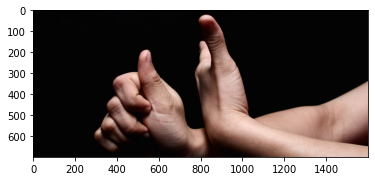

In [72]:
if not results.multi_face_landmarks:
      print("Face landmarks have not been found.")
      plt.imshow(image[:,:,::-1])
      plt.show()
else:
    first_face_landmarks = results.multi_face_landmarks[0]
    print("Face landmarks type:\n\t" + str(type(first_face_landmarks)))

    landmarks = first_face_landmarks.landmark
    print("Landmarks type:\n\t" + str(type(landmarks)))
    print("Landmarks length:\n\t" + str(len(landmarks)))
    print("Some landmarks:\n" + str((landmarks[:5])))

    landmark = first_face_landmarks.landmark[123]
    print("Single landmark type:\n\t" + str(type(landmark)))
    print("Landmark coordinates:" +
          "\n\tx = " + str(landmark.x) +
          "\n\ty = " + str(landmark.y) +
          "\n\tz = " + str(landmark.z))



